# **GROUP_MEMBER_NAME:**

**Dhara patel**

**Dhruv suthar** 

## **`INTRODUCTION`**:
The detection of fake or real news is a hot topic in machine learning and natural language processing (NLP). The project's objective is to categorise news stories as real or false based on their content. This is a crucial role since the dissemination of false information can have negative effects on people and society, including the manipulation of public opinion and the spread of disinformation.

## **HOW ITS WORKS?**

Data collection, preprocessing, feature extraction, model training, evaluation, and deployment are some of the phases in the fake or true news detection project utilising NLP. A model that can effectively categorise news articles and hinder the spread of fake news can be created by combining machine learning algorithms and NLP approaches.

### **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math


# Machine Learning libraries
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
 
#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score



### **DATA COLLECTION**:
**(TOTAL NEWS : 50000 (FIFTY THOUSANDS DATA))**

Gathering a large dataset of news articles, which includes both fake and true news.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving True.csv to True.csv


In [4]:
data_fake = pd.read_csv("Fake.csv")
data_true = pd.read_csv("True.csv")

In [5]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
data_fake.info()
print('\n')
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
data_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [9]:
data_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [10]:
display(data_fake.subject.value_counts())

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [11]:
display(data_true.subject.value_counts())

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [12]:
data_fake["label"] = 0
data_true["label"] = 1

In [13]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [14]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i], axis = 0, inplace = True)
    
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i], axis = 0, inplace = True)

In [15]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [17]:
data_fake_manual_testing.head(10)

,title,text,subject,date,label
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [18]:
data_true_manual_testing.head(10)

,title,text,subject,date,label
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [19]:
df_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis = 0)


In [20]:
df_manual_testing.to_csv("manual_testing.csv")

In [21]:
df_manual_testing

,title,text,subject,date,label
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [22]:
data_merge = pd.concat([data_fake, data_true], axis =0 )
data_merge.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [23]:
data_merge.tail(10)

,title,text,subject,date,label
21397,Germany's Schulz says he would demand U.S. wit...,BERLIN (Reuters) - The leader of Germany s Soc...,worldnews,"August 23, 2017",1
21398,Blunt instrument? What a list of banned articl...,SHANGHAI (Reuters) - An old review of an acade...,worldnews,"August 23, 2017",1
21399,Saudi police release teenager detained for dan...,DUBAI (Reuters) - A 14-year-old boy who was de...,worldnews,"August 22, 2017",1
21400,"The People's Princess, Britons work to keep me...",LONDON (Reuters) - Abdul Daoud spilt most of t...,worldnews,"August 23, 2017",1
21401,"Argentina labor unions protest job losses, Mac...",BUENOS AIRES (Reuters) - Argentina s main labo...,worldnews,"August 22, 2017",1
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


In [24]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [25]:
data_merge.describe()

,label
count,44878.000000
mean,0.477004
std,0.499476
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [26]:
data_merge.nunique()

title      38721
text       38637
subject        8
date        2397
label          2
dtype: int64

In [27]:
data_merge.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

### **CORRELATION MATRIX**

In [30]:
correlation = data_merge.corr()
correlation.style.background_gradient(cmap='coolwarm')
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
correlation.style.background_gradient(cmap=cm).set_precision(2)

<ipython-input-30-7988659d7dc9>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation.style.background_gradient(cmap=cm).set_precision(2)


,label
label,1.00


In [31]:
df = data_merge.drop(["title", "subject","date"], axis = 1)
df.head(10)

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [32]:
df.tail(10)

,text,label
21397,BERLIN (Reuters) - The leader of Germany s Soc...,1
21398,SHANGHAI (Reuters) - An old review of an acade...,1
21399,DUBAI (Reuters) - A 14-year-old boy who was de...,1
21400,LONDON (Reuters) - Abdul Daoud spilt most of t...,1
21401,BUENOS AIRES (Reuters) - Argentina s main labo...,1
21402,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,1
21403,WASHINGTON (Reuters) - The United States sugge...,1
21404,WASHINGTON (Reuters) - The United States has d...,1
21405,ISLAMABAD (Reuters) - Outlining a new strategy...,1
21406,GENEVA (Reuters) - North Korea and the United ...,1


In [33]:
df = df.sample(frac = 1)
df.head(10)

,text,label
2101,"WASHINGTON/HAGERSTOWN, Md. (Reuters) - Preside...",1
12798,,0
14710,BRUSSELS (Reuters) - The European Commission o...,1
5383,After Ellen Pompeo viewed yet other shooting o...,0
828,Donald Trump s presidency is spiraling out of ...,0
12527,OTTAWA (Reuters) - U.S. Secretary of State Rex...,1
6191,It s being dubbed the rare boycott that actua...,0
9315,Even more reason to believe it s a good thing...,0
19551,NEW YORK (Reuters) - U.S. President Donald Tru...,1
1315,WASHINGTON (Reuters) - The Republican chairman...,1


In [34]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [35]:
df.columns

Index(['text', 'label'], dtype='object')

In [36]:
df.tail(10)

,text,label
44868,The news that Russia interfered in our electio...,0
44869,"SAN ANTONIO, Texas (Reuters) - A special feder...",1
44870,NEW YORK (Reuters) - Supporters of U.S. Presid...,1
44871,CARACAS (Reuters) - Venezuelan President Nicol...,1
44872,WASHINGTON (Reuters) - President Donald Trump ...,1
44873,BEIRUT (Reuters) - A Lebanese taxi driver with...,1
44874,BAGHDAD (Reuters) - Arms provided by the Unite...,1
44875,PARIS (Reuters) - French police unearthed a se...,1
44876,WASHINGTON/CAIRO (Reuters) - Egypt defended on...,1
44877,BOSTON (Reuters) - FBI Director James Comey sa...,1


### **NLTK libraries**

In [41]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [43]:
train_data, test_data = train_test_split(df, test_size=0.2) 
stop = stopwords.words('english')

# **TOKENISATION**:

Tokenization is the process of dividing up a text into discrete tokens, usually words or groups of words, for use in subsequent processing or analysis.

In [44]:
train_data['tweet_tokenized'] = train_data.apply(lambda row: word_tokenize(row['text']), axis=1) 
test_data['tweet_tokenized'] = test_data.apply(lambda row: word_tokenize(row['text']), axis=1) 
train_data.head()

,text,label,tweet_tokenized
10182,"When you think of civil rights activists, it s...",0,"[When, you, think, of, civil, rights, activist..."
12499,Democrats have the perfect weapon to take down...,0,"[Democrats, have, the, perfect, weapon, to, ta..."
23283,Sounds about right. Thank goodness for the new...,0,"[Sounds, about, right, ., Thank, goodness, for..."
37418,OBAMA S AMERICA: Why do you think people are ...,0,"[OBAMA, S, AMERICA, :, Why, do, you, think, pe..."
5429,BERLIN (Reuters) - Germans should be proud of ...,1,"[BERLIN, (, Reuters, ), -, Germans, should, be..."


## **PUNCTUATION :**

Punctuation in text processing refers to the group of symbols, including periods, commas, and semicolons, that are employed to make sentences' structures and meanings clear.

In [45]:
train_data['tweet_nopunct'] = train_data['tweet_tokenized'].apply(lambda x: [word.lower() for word in x if word.isalpha()]) 
test_data['tweet_nopunct'] = test_data['tweet_tokenized'].apply(lambda x: [word.lower() for word in x if word.isalpha()]) 
train_data.head()

,text,label,tweet_tokenized,tweet_nopunct
10182,"When you think of civil rights activists, it s...",0,"[When, you, think, of, civil, rights, activist...","[when, you, think, of, civil, rights, activist..."
12499,Democrats have the perfect weapon to take down...,0,"[Democrats, have, the, perfect, weapon, to, ta...","[democrats, have, the, perfect, weapon, to, ta..."
23283,Sounds about right. Thank goodness for the new...,0,"[Sounds, about, right, ., Thank, goodness, for...","[sounds, about, right, thank, goodness, for, t..."
37418,OBAMA S AMERICA: Why do you think people are ...,0,"[OBAMA, S, AMERICA, :, Why, do, you, think, pe...","[obama, s, america, why, do, you, think, peopl..."
5429,BERLIN (Reuters) - Germans should be proud of ...,1,"[BERLIN, (, Reuters, ), -, Germans, should, be...","[berlin, reuters, germans, should, be, proud, ..."


## **STOPWORDS:**

Stopwords are words that are often used in a language, like "a," "the," and "in," and which are typically eliminated from text data during preprocessing in order to concentrate on the more important words in a document.

In [46]:
train_data['tweet_nostopword'] = train_data['tweet_nopunct'].apply(lambda x: [word for word in x if word not in (stop)]) 
test_data['tweet_nostopword'] = test_data['tweet_nopunct'].apply(lambda x: [word for word in x if word not in (stop)]) 
train_data.head()

,text,label,tweet_tokenized,tweet_nopunct,tweet_nostopword
10182,"When you think of civil rights activists, it s...",0,"[When, you, think, of, civil, rights, activist...","[when, you, think, of, civil, rights, activist...","[think, civil, rights, activists, likely, glen..."
12499,Democrats have the perfect weapon to take down...,0,"[Democrats, have, the, perfect, weapon, to, ta...","[democrats, have, the, perfect, weapon, to, ta...","[democrats, perfect, weapon, take, donald, tru..."
23283,Sounds about right. Thank goodness for the new...,0,"[Sounds, about, right, ., Thank, goodness, for...","[sounds, about, right, thank, goodness, for, t...","[sounds, right, thank, goodness, new, hate, cr..."
37418,OBAMA S AMERICA: Why do you think people are ...,0,"[OBAMA, S, AMERICA, :, Why, do, you, think, pe...","[obama, s, america, why, do, you, think, peopl...","[obama, america, think, people, leaving, air, ..."
5429,BERLIN (Reuters) - Germans should be proud of ...,1,"[BERLIN, (, Reuters, ), -, Germans, should, be...","[berlin, reuters, germans, should, be, proud, ...","[berlin, reuters, germans, proud, soldiers, ac..."


## **LEMMATISATION:**

Lemmatization, which groups together many inflected versions of the same word like "am," "is," and "are," is the process of reducing words to their basic or dictionary form (lemma).

In [47]:
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()

In [48]:
train_data['tweet_lemma'] = train_data['tweet_nostopword'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x]) 
test_data['tweet_lemma'] = test_data['tweet_nostopword'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x]) 
train_data.head()

,text,label,tweet_tokenized,tweet_nopunct,tweet_nostopword,tweet_lemma
10182,"When you think of civil rights activists, it s...",0,"[When, you, think, of, civil, rights, activist...","[when, you, think, of, civil, rights, activist...","[think, civil, rights, activists, likely, glen...","[think, civil, right, activist, likely, glenn,..."
12499,Democrats have the perfect weapon to take down...,0,"[Democrats, have, the, perfect, weapon, to, ta...","[democrats, have, the, perfect, weapon, to, ta...","[democrats, perfect, weapon, take, donald, tru...","[democrat, perfect, weapon, take, donald, trum..."
23283,Sounds about right. Thank goodness for the new...,0,"[Sounds, about, right, ., Thank, goodness, for...","[sounds, about, right, thank, goodness, for, t...","[sounds, right, thank, goodness, new, hate, cr...","[sound, right, thank, goodness, new, hate, cri..."
37418,OBAMA S AMERICA: Why do you think people are ...,0,"[OBAMA, S, AMERICA, :, Why, do, you, think, pe...","[obama, s, america, why, do, you, think, peopl...","[obama, america, think, people, leaving, air, ...","[obama, america, think, people, leaving, air, ..."
5429,BERLIN (Reuters) - Germans should be proud of ...,1,"[BERLIN, (, Reuters, ), -, Germans, should, be...","[berlin, reuters, germans, should, be, proud, ...","[berlin, reuters, germans, proud, soldiers, ac...","[berlin, reuters, german, proud, soldier, achi..."


## **STEMMING:**

Stemming, the process of stripping words of their suffixes to return them to their root form, can assist in organising several inflected forms of a single word, such as "jump," "jumps," and "jumping" to "jump."

In [49]:
train_data['tweet_steming'] = train_data['tweet_lemma'].apply(lambda x: [porter.stem(word) for word in x]) 
test_data['tweet_steming'] = test_data['tweet_lemma'].apply(lambda x: [porter.stem(word) for word in x])
train_data.head()

,text,label,tweet_tokenized,tweet_nopunct,tweet_nostopword,tweet_lemma,tweet_steming
10182,"When you think of civil rights activists, it s...",0,"[When, you, think, of, civil, rights, activist...","[when, you, think, of, civil, rights, activist...","[think, civil, rights, activists, likely, glen...","[think, civil, right, activist, likely, glenn,...","[think, civil, right, activist, like, glenn, b..."
12499,Democrats have the perfect weapon to take down...,0,"[Democrats, have, the, perfect, weapon, to, ta...","[democrats, have, the, perfect, weapon, to, ta...","[democrats, perfect, weapon, take, donald, tru...","[democrat, perfect, weapon, take, donald, trum...","[democrat, perfect, weapon, take, donald, trum..."
23283,Sounds about right. Thank goodness for the new...,0,"[Sounds, about, right, ., Thank, goodness, for...","[sounds, about, right, thank, goodness, for, t...","[sounds, right, thank, goodness, new, hate, cr...","[sound, right, thank, goodness, new, hate, cri...","[sound, right, thank, good, new, hate, crime, ..."
37418,OBAMA S AMERICA: Why do you think people are ...,0,"[OBAMA, S, AMERICA, :, Why, do, you, think, pe...","[obama, s, america, why, do, you, think, peopl...","[obama, america, think, people, leaving, air, ...","[obama, america, think, people, leaving, air, ...","[obama, america, think, peopl, leav, air, forc..."
5429,BERLIN (Reuters) - Germans should be proud of ...,1,"[BERLIN, (, Reuters, ), -, Germans, should, be...","[berlin, reuters, germans, should, be, proud, ...","[berlin, reuters, germans, proud, soldiers, ac...","[berlin, reuters, german, proud, soldier, achi...","[berlin, reuter, german, proud, soldier, achie..."


### **CLEAN_DATASET**

In [50]:
train_data['clean_tweets'] = train_data['tweet_steming'].apply(lambda x:' '.join(x))
test_data['clean_tweets'] = test_data['tweet_steming'].apply(lambda x:' '.join(x))

test_data[['label','text','clean_tweets']].head() 

,label,text,clean_tweets
4872,0,What happens when a thin-skinned bully becomes...,happen bulli becom presid appar even threaten ...
38182,1,BRUSSELS (Reuters) - The European Union s chie...,brussel reuter european union chief negoti mic...
22633,1,WASHINGTON (Reuters) - In Friday’s speech layi...,washington reuter friday speech lay strategi t...
6010,0,Thierry Meyssan Voltaire NetIt is a scandal wi...,thierri meyssan voltair netit scandal without ...
23936,1,DUBLIN (Reuters) - Ireland s minister for soci...,dublin reuter ireland minist social protect sa...


In [51]:
train_data['clean_tweets'] = train_data['clean_tweets'].astype(str)
test_data['clean_tweets'] = test_data['clean_tweets'].astype(str)

In [52]:
A=np.zeros(train_data['clean_tweets'].shape, dtype='uint8')
B=np.zeros(test_data['clean_tweets'].shape, dtype='uint8')

## **COUNTVECTORIZER:**

A method for creating a matrix of token counts from a collection of text documents is called "CountVectorizer."
## **Tfid_VECTORIZER:**

TfidfVectorizer is a variation of CountVectorizer that weighs the significance of each term in a document using the term frequency-inverse document frequency (TF-IDF) metric.

## **Tfid_TRANSFOMER:**

A matrix of term frequencies is sent into the TfidfTransformer, which converts it into a matrix of TF-IDF weights.




In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd

In [54]:
text_data = train_data['clean_tweets'].tolist()

In [55]:
count_vectorizer = CountVectorizer()
count_data = count_vectorizer.fit_transform(text_data)

In [56]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_data = tfidf_vectorizer.fit_transform(text_data)

In [57]:
tfidf_transformer = TfidfTransformer()
tfidf_data = tfidf_transformer.fit_transform(count_data)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Separating train and test labels from all features
train_Y = train_data['label']
test_Y = test_data['label']

## MODEL TRAINING

In [59]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_data, train_Y, test_size=0.3, random_state = 42)

## **LOGISTIC_REGRESSION ALGORITHM**

In [60]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred_lr = LR.predict(X_test)

lr_score = LR.score(X_test, y_test)
print(f'Accuracy: {round(lr_score*100, 2)}%')

print(classification_report(y_test, pred_lr))

Accuracy: 98.15%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5615
           1       0.98      0.98      0.98      5156

    accuracy                           0.98     10771
   macro avg       0.98      0.98      0.98     10771
weighted avg       0.98      0.98      0.98     10771



In [61]:
=import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns


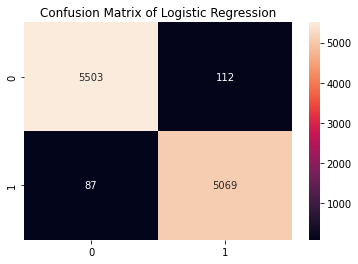

In [62]:
lr_cfm = confusion_matrix(y_test, pred_lr)
plt.title('Confusion Matrix of Logistic Regression')
sns.heatmap(lr_cfm, annot=True, fmt="d")
plt.show()

### **DECISION_TREE CLASSIFIER ALGORITHM**

In [63]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)


DecisionTreeClassifier()

In [64]:
pred_dtc = DTC.predict(X_test)
dtc_score = DTC.score(X_test, y_test)
print(f'Accuracy: {round(dtc_score*100, 2)}%')

Accuracy: 99.53%


In [65]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5615
           1       0.99      1.00      1.00      5156

    accuracy                           1.00     10771
   macro avg       1.00      1.00      1.00     10771
weighted avg       1.00      1.00      1.00     10771



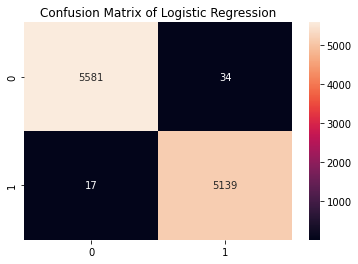

In [155]:
dtc_cfm = confusion_matrix(y_test, pred_dtc)
plt.title('Confusion Matrix of Logistic Regression')
sns.heatmap(dtc_cfm, annot=True, fmt="d")
plt.show()

### **RANDOM_FOREST CLASSIFIER ALGORITHM**

In [67]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train, y_train)
pred_rfc = RFC.predict(X_test)

In [68]:
rfc_score = RFC.score(X_test, y_test)
print(f'Accuracy: {round(rfc_score*100, 2)}%')



Accuracy: 98.81%


In [69]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5615
           1       0.99      0.99      0.99      5156

    accuracy                           0.99     10771
   macro avg       0.99      0.99      0.99     10771
weighted avg       0.99      0.99      0.99     10771



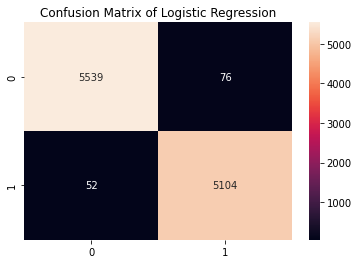

In [154]:
rfc_cfm = confusion_matrix(y_test, pred_rfc)
plt.title('Confusion Matrix of Logistic Regression')
sns.heatmap(rfc_cfm, annot=True, fmt="d")
plt.show()

### **MANUAL TESTING**

In [142]:
stop_words = stopwords.words('english')
stemmer = PorterStemmer()
def preprocess_text(text):
    
    tokens = nltk.word_tokenize(text.lower())

    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]

    tokens = [stemmer.stem(t) for t in tokens]

    text = " ".join(tokens)
    
    return text

In [143]:
df_manual_testing['text'] =df_manual_testing['text'].apply(preprocess_text)

In [152]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(preprocess_text) 
    new_x_test = new_def_test["text"]
    new_xv_test = count_vectorizer.transform(new_x_test)
   
    pred_LR = LR.predict(new_xv_test)
    pred_DTC = DTC.predict(new_xv_test)
  
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDTC Prediction: {} \nRFC Prediction: {} ".format(output_lable(pred_LR[0]), output_lable(pred_DTC[0]), output_lable(pred_RFC[0])))

**MANUAL_TESTING_FAKE_NEWS**

In [153]:
news = str(input())
manual_testing(news)

Tune in to the Alternate Current Radio Network (ACR) for another LIVE broadcast of  The Boiler Room  starting at 6 PM PST | 9 PM EST every Wednesday. Join us for uncensored, uninterruptible talk radio, custom-made for barfly philosophers, misguided moralists, masochists, street corner evangelists, media-maniacs, savants, political animals and otherwise lovable rascals.Join ACR hosts Hesher, & Spore along with Andy Nowicki from Alt Right Blogspot, ACR/21Wire contributor Randy J and Stewart Howe. In this broadcast we re going off the rails and off the cuffs, listeners will be hearing us go around the BOILER ROOM on a myriad of topics tonight including  relief booths  in the city, Sarah Palin s endorsement of Donald Trump, whether or not there is any hope in the political system, reported sexual assaults in Cologne, the Oregon standoff and El Chapo owning Fast and Furious weapons. If you want to participate, bring something interesting to throw into the boiler Join us in the ALTERNATE CUR

**MANUAL_TESTING_TRUE_NEWS**

In [141]:
news = str(input())
manual_testing(news)

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of